In [55]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [56]:
#Load Data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [57]:
#train_filter = np.where((y_train == 0 ) | (y_train == 1 ))
#test_filter = np.where((y_test == 0) | (y_test == 1))

In [58]:
#X_train, y_train = X_train[train_filter], y_train[train_filter]
#X_test, y_test = X_test[test_filter], y_test[test_filter]
print(X_train.shape)

(60000, 28, 28)


In [59]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])


In [60]:
X_train = X_train[:3000]
y_train = y_train[:3000]

In [61]:
#Check unique items from y_train
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


In [62]:
#reshape the y_train set
y_train = y_train.reshape(-1, 1)
print(str(y_train.shape))
print(str(X_train.shape))

(3000, 1)
(3000, 784)


In [63]:
from os import name
model = Sequential([
    tf.keras.Input(shape=(784,)),
    Dense(units=100, activation='relu', name="layer1"),
    Dense(units=30, activation='relu', name="layer2"),
    Dense(units=10, activation='softmax', name="layer3")
], name = "my_model")

In [64]:
model.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 30)             │         3,030 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer3 (Dense)                  │ (None, 10)             │           310 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,840 (319.69 KB)

 Trainable params: 81,840 (319.69 KB)

 Non-trainable params: 0 (0.00 B)

In [65]:
[layer1, layer2, layer3] = model.layers

In [66]:
#get initial W values
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (784, 100), b1 shape = (100,)
W2 shape = (100, 30), b2 shape = (30,)
W3 shape = (30, 10), b3 shape = (10,)


In [67]:
model.compile(
    loss=SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
    optimizer=Adam(0.001),
)
#model.fit(X_train, y_train, epochs=29)
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/backend/tensorflow/nn.py:717: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3106 - loss: 28.8205 - val_accuracy: 0.4417 - val_loss: 1.9038
Epoch 2/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4893 - loss: 1.5294 - val_accuracy: 0.5400 - val_loss: 1.6273
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5701 - loss: 1.2129 - val_accuracy: 0.5783 - val_loss: 1.4949
Epoch 4/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6607 - loss: 1.0082 - val_accuracy: 0.5800 - val_loss: 1.6100
Epoch 5/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6529 - loss: 1.0470 - val_accuracy: 0.6533 - val_loss: 1.3576
Epoch 6/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7009 - loss: 0.8903 - val_accuracy: 0.6700 - val_loss: 1.4547
Epoch 7/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7168 - loss: 0.8378 - val_accuracy: 0.6483 - val_loss: 1.4506
Epoch 8/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7432 - loss: 0.7666 - val_accuracy: 0.6717 - val_loss: 1.3151
Ep

In [68]:
#prediction out put from the softmax nueron layer
prediction = model.predict(X_train[0].reshape(1,784))
print(f"predictiong a zero: {prediction}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
predictiong a zero: [[1.19822825e-26 0.00000000e+00 1.65296138e-10 1.74723551e-01
  6.88377389e-38 8.25276256e-01 9.60965474e-11 1.64934158e-30
  6.44065387e-25 1.74712369e-07]]


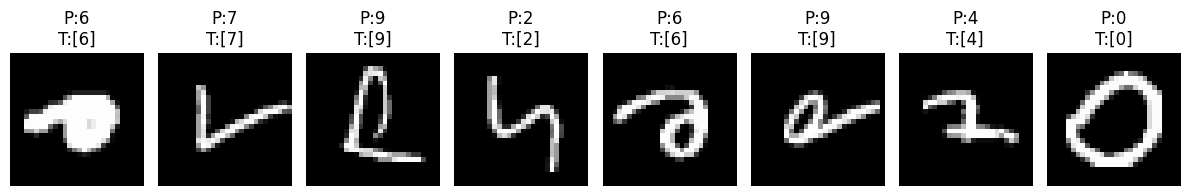

In [69]:
#Predict 8 values
warnings.simplefilter(action='ignore', category=FutureWarning)

# Pick 8 random indices
random_indices = np.random.randint(0, X_train.shape[0], size=8)

plt.figure(figsize=(12, 4))  # Wider figure to fit 8 images in one row

for i, idx in enumerate(random_indices):
    # Get prediction probabilities for 10 classes
    prediction = model.predict(X_train[idx].reshape(1, 784), verbose=0)
    predicted_label = np.argmax(prediction)  # get index of max probability

    # Reshape the image
    img = X_train[idx].reshape(28, 28).T

    # Plot the image
    plt.subplot(1, 8, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"P:{predicted_label}\nT:{y_train[idx]}")
    plt.axis('off')

plt.tight_layout()
plt.show()
